In [133]:
import json

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False  # https://stackoverflow.com/questions/43102564/matplotlib-negative-numbers-on-tick-labels-displayed-as-boxes
plt.style.use('seaborn-ticks')  # 'seaborn-ticks'
import numpy as np
import seaborn as sns 

In [145]:
colors = json.load(open(r'..\data\metadata\color_schemes.json'))
colors['Non-fasted'] = colors['RBG']
colors['Fasted'] = colors['FBG']
compound_superclasses = json.load(open('../data/metadata/compound_superclasses.json', 'r'))
    
data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

In [24]:
data['signif_interaction'] = data['qval_sampling:ogtt'] < 0.05
data['signif_sampling'] = data['qval_sampling'] < 0.05

In [79]:
df = data[data_cols].T.copy()
df = (df
#     .join(fg['bg_type'])
    .groupby(fg['bg_type'])
    .mean()
     )
# display(df)
fc = ((df.loc['RBG'] - df.loc['FBG'])
      .to_frame('Log2 Fold Change')
#       .join(-np.log10(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt']]))
      .join(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt', 
                  'superclass', 'coef_fasted', 'coef_fed', 'model_param_ogtt', 'Type']])
     )
display(fc)
fc['Fed - Fasted slope'] = fc['coef_fed'] - fc['coef_fasted']
fc['signif_sampling'] = fc['qval_sampling'] < 0.05
fc['signif_interact'] = fc['qval_sampling:ogtt'] < 0.05
fc['log_qval_sampling'] = -np.log10(fc['qval_sampling'])
fc['log_qval_ogtt'] = -np.log10(fc['qval_ogtt'])
fc['log_qval_sampling:ogtt'] = -np.log10(fc['qval_sampling:ogtt'])
fc['is_id'] = fc['superclass'] != 'Unidentified'
fc

,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Type
i,,,,,,,,,
m_0,0.278770,6.107470e-01,0.000223,0.625991,Unidentified,6.955843e-05,0.000093,6.955843e-05,metabolite
m_1,0.877417,2.704523e-10,0.002746,0.000131,Unidentified,-6.598915e-06,0.000037,-6.598915e-06,metabolite
m_2,-0.331312,1.839761e-01,0.655652,0.682464,Nitrogen heterocycle,-6.092323e-07,-0.000010,-6.092324e-07,metabolite
m_3,-0.712096,1.238196e-10,0.085684,0.530633,Nitrogen heterocycle,-9.615231e-06,-0.000004,-9.615231e-06,metabolite
m_4,0.780719,4.040584e-01,0.040484,0.251925,Nitrogen heterocycle,-1.235729e-04,-0.000032,-1.235729e-04,metabolite
...,...,...,...,...,...,...,...,...,...
l_915,0.511175,1.455363e-02,0.003218,0.006071,Glycerolipid,2.209285e-07,0.000051,2.209284e-07,lipid
l_916,0.612111,7.250113e-02,0.405573,0.006059,Unidentified,-2.865160e-05,0.000054,-2.865160e-05,lipid
l_917,-1.423496,1.136381e-08,0.283136,0.006048,Unidentified,-1.689329e-05,0.000038,-1.689329e-05,lipid


,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Type,Fed - Fasted slope,signif_sampling,signif_interact,log_qval_sampling,log_qval_ogtt,log_qval_sampling:ogtt,is_id
i,,,,,,,,,,,,,,,,
m_0,0.278770,6.107470e-01,0.000223,0.625991,Unidentified,6.955843e-05,0.000093,6.955843e-05,metabolite,0.000023,False,False,0.214139,3.652273,0.203432,False
m_1,0.877417,2.704523e-10,0.002746,0.000131,Unidentified,-6.598915e-06,0.000037,-6.598915e-06,metabolite,0.000044,True,True,9.567909,2.561375,3.883399,False
m_2,-0.331312,1.839761e-01,0.655652,0.682464,Nitrogen heterocycle,-6.092323e-07,-0.000010,-6.092324e-07,metabolite,-0.000009,False,False,0.735239,0.183327,0.165920,True
m_3,-0.712096,1.238196e-10,0.085684,0.530633,Nitrogen heterocycle,-9.615231e-06,-0.000004,-9.615231e-06,metabolite,0.000005,True,False,9.907211,1.067102,0.275206,True
m_4,0.780719,4.040584e-01,0.040484,0.251925,Nitrogen heterocycle,-1.235729e-04,-0.000032,-1.235729e-04,metabolite,0.000091,False,False,0.393556,1.392715,0.598729,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_915,0.511175,1.455363e-02,0.003218,0.006071,Glycerolipid,2.209285e-07,0.000051,2.209284e-07,lipid,0.000051,True,True,1.837029,2.492453,2.216767,True
l_916,0.612111,7.250113e-02,0.405573,0.006059,Unidentified,-2.865160e-05,0.000054,-2.865160e-05,lipid,0.000083,False,True,1.139655,0.391931,2.217583,False
l_917,-1.423496,1.136381e-08,0.283136,0.006048,Unidentified,-1.689329e-05,0.000038,-1.689329e-05,lipid,0.000055,True,True,7.944476,0.548006,2.218408,False


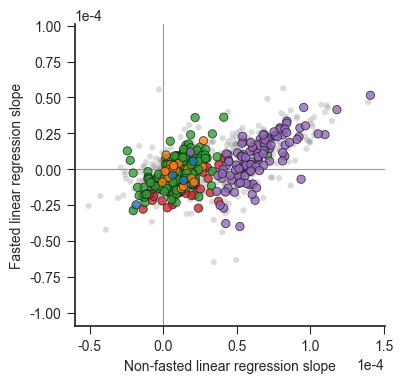

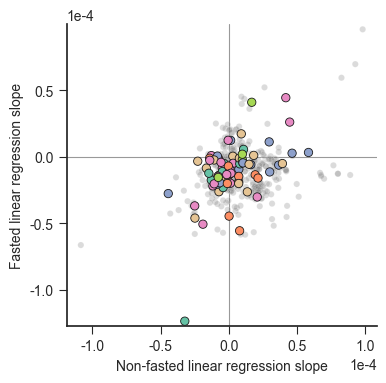

In [182]:
def fasted_fed_slope(_type, ax=None, alpha=0.8, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4), dpi=100)
    sns.scatterplot(
        data=data.loc[(data['superclass'] != 'Unidentified') & (data['Type'] == _type)],
        x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors, 
#         s=30, linewidth=0.5, edgecolor='gray',
        edgecolor='0.1', linewidth=0.6,
        alpha=alpha, legend=legend)
    sns.scatterplot(
        data=data.loc[(data['superclass'] == 'Unidentified') & (data['Type'] == _type)],
        x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors, s=20,
        alpha=0.28, zorder=-10, legend=legend)

    ###### 2 options for making sure the axes are equally scaled to not bias against non-fasted:
    ########## 1. ax.set_aspect('equal') enforces square, but distorts plot
    ########## 2. ylim average +/- 0.5 * xlim range 
    avg_ylim = np.mean([y for y in ax.get_ylim()])
    xlim_range = abs(ax.get_xlim()[0] - ax.get_xlim()[1])
    ax.set_ylim(avg_ylim-0.5*xlim_range, avg_ylim+0.5*xlim_range)
    ax.set_ylabel('Fasted linear regression slope')
    ax.set_xlabel('Non-fasted linear regression slope')
    ax.ticklabel_format(style='sci', scilimits=(-1, 1))
    ax.axvline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
    ax.axhline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
    if legend:
        ax.legend(loc=(0.8, 0.05), markerscale=1.2)
    sns.despine()

fasted_fed_slope('lipid', alpha=0.8)
fasted_fed_slope('metabolite', alpha=1)

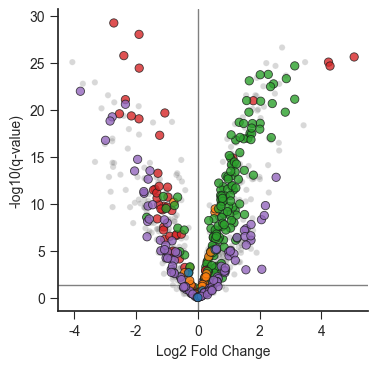

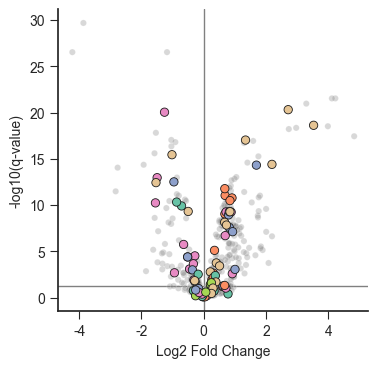

In [181]:
def volcano(x, y, df, metab_type, alpha=0.8, ax=None, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4), dpi=100)
    sns.scatterplot(
        data=df.loc[(df['superclass'] != 'Unidentified') & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors, 
#         s=30, linewidth=0.2, edgecolor='gray',
        edgecolor='0.1', linewidth=0.6,
        ax=ax, alpha=alpha, legend=legend)
    sns.scatterplot(
        data=df.loc[(df['superclass'] == 'Unidentified') & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors, ax=ax, 
        s=20,
        alpha=0.3, zorder=-10, legend=legend)
    ax.ticklabel_format(style='sci', scilimits=(-2, 2))
    ax.set_ylabel('-log10(q-value)')
    if legend:
        ax.legend(loc=(1.01, 0.1), markerscale=1.2)
#     ax.set_title(y)
    ax.axvline(0, linewidth=1, c='0.5', zorder=-99)
    ax.axhline(-np.log10(0.05), linewidth=1, c='0.5', zorder=-99)
    sns.despine()
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='lipid')
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='metabolite', alpha=1)

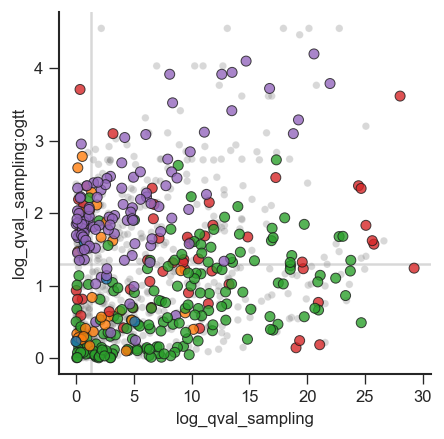

In [188]:
def pvals_plot(x, y, df, metab_type, alpha=0.8, ax=None, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4), dpi=120)
    sns.scatterplot(
        data=df.loc[(df['is_id'] == True) & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors,
        edgecolor='0.1', linewidth=0.6, ax=ax, legend=legend, alpha=alpha)
    sns.scatterplot(
        data=df.loc[(df['is_id'] == False) & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors, s=20, ax=ax, legend=legend, alpha=0.3, zorder=-10)
    ax.axhline(-np.log10(0.05), c='gray', alpha=0.3, zorder=-99)
    ax.axvline(-np.log10(0.05), c='gray', alpha=0.3, zorder=-99)
    if legend:
        ax.legend(loc=(1.01, 0.1), markerscale=1.2)
    sns.despine()
pvals_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, metab_type='lipid')

# Combine all the plots

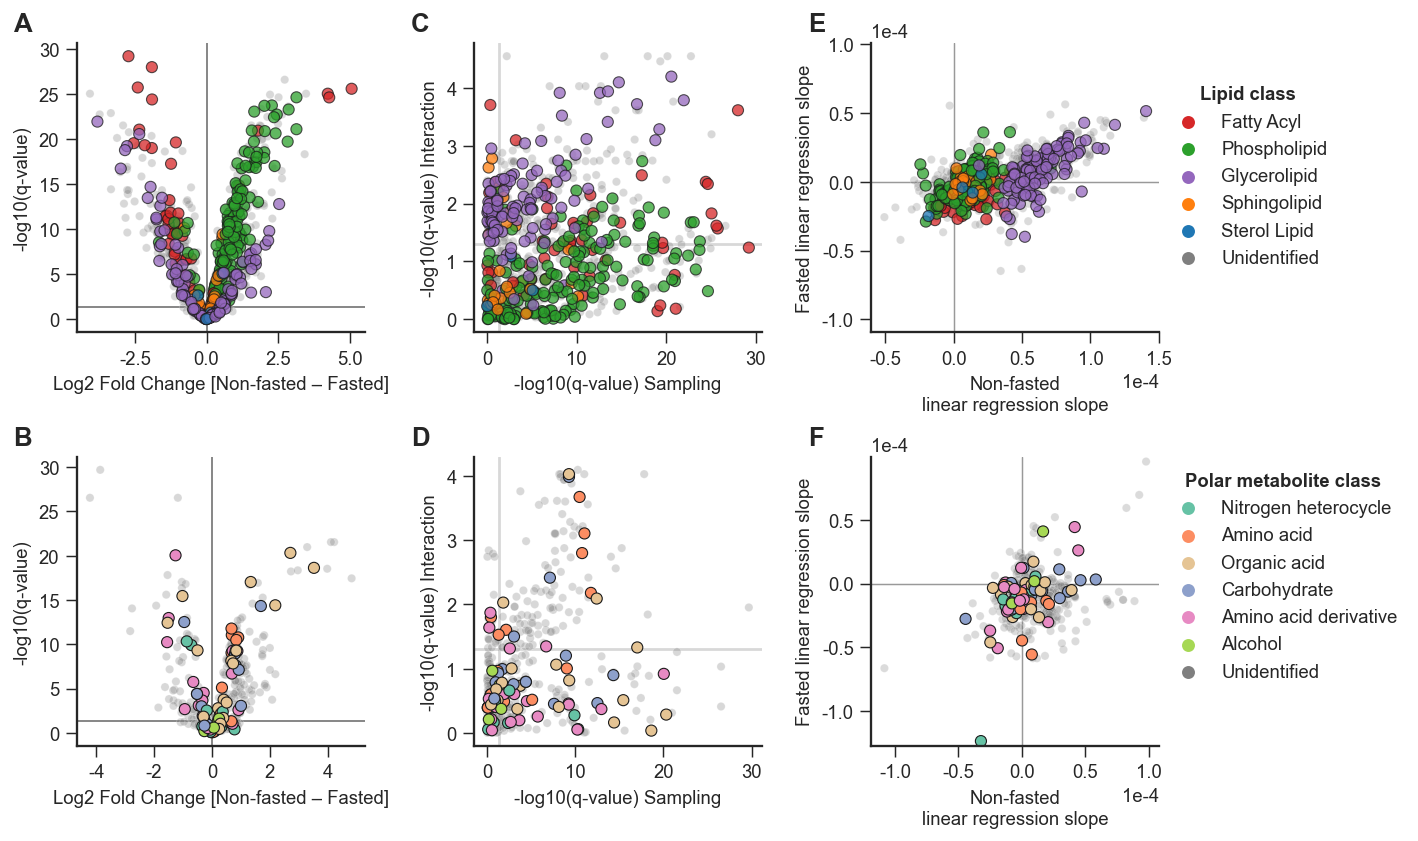

In [222]:
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10.5, 7), dpi=133,
                        gridspec_kw={'hspace': 0.43, 'wspace': 0.38})

ax1 = axs[0][0]
ax2 = axs[1][0]
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='lipid', ax=ax1, alpha=0.75)
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='metabolite', ax=ax2, alpha=1)
ax1.set_xlabel('Log2 Fold Change [Non-fasted – Fasted]')
ax2.set_xlabel('Log2 Fold Change [Non-fasted – Fasted]')

# volcano(x='Log2 Fold Change', y='log_qval_sampling:ogtt', df=fc, metab_type='lipid', ax=axs[0][1], alpha=0.8)
# volcano(x='Log2 Fold Change', y='log_qval_sampling:ogtt', df=fc, metab_type='metabolite', ax=axs[1][1], alpha=1)

ax1 = axs[0][1]
ax2 = axs[1][1]
pvals_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, metab_type='lipid', ax=ax1, alpha=0.75)
pvals_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, metab_type='metabolite', ax=ax2, alpha=1)
ax1.set_xlabel('-log10(q-value) Sampling')
ax2.set_xlabel('-log10(q-value) Sampling')
ax1.set_ylabel('-log10(q-value) Interaction')
ax2.set_ylabel('-log10(q-value) Interaction')

ax1 = axs[0][2]
ax2 = axs[1][2]
fasted_fed_slope('lipid',      ax=ax1, alpha=0.75, legend=True)
fasted_fed_slope('metabolite', ax=ax2, alpha=1, legend=True)
ax1.legend(loc=(1.01, 0.2), title='Lipid class',  title_fontproperties={'weight':'bold'})
ax2.legend(loc=(1.01, 0.2), title='Polar metabolite class',  title_fontproperties={'weight':'bold'})
ax1.set_xlabel('Non-fasted\nlinear regression slope')
ax2.set_xlabel('Non-fasted\nlinear regression slope')

label = iter('ABCDEFGHIJ'[:nrows*ncols])
for col in range(ncols):
    for row in range(nrows):
        ax = axs[row][col]
        ax.text(s=next(label), x=-0.22, y=1.04, transform=ax.transAxes, fontsize=14, fontweight='bold')

# plt.savefig(r'../reports/figures/Figure_omics/volcano-pvalpval-slopeslope-plots.pdf', dpi=150, bbox_inches='tight')
# plt.savefig(r'../reports/figures/Figure_omics/volcano-pvalpval-slopeslope-plots.png', dpi=150, bbox_inches='tight')

In [72]:
# fig, ax = volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='lipid')
# ax.set_title('Sampling-OGTT glucose AUC Interaction')
# ax.set_xlabel('Non-fasted - Fasted slope')

In [73]:
# volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='metabolite', alpha=1)

# p-value vs. p-value plots

In [75]:
# relplot = sns.relplot(
#     data=fc.loc[fc['is_id']], x='log_qval_sampling', y='log_qval_sampling:ogtt', hue='superclass', palette=colors,
#     col='Type', 
# )
# fig = relplot.fig
# # legend = relplot.legend
# # legend = fig.axes[0].get_legend()
# legend = fig.legend()
# # legend(loc=(1.01, 0.5))
# # legend.(loc=(0.5, 0.5), )
# fig.set_size_inches((7, 4))
# fig.set_dpi(120)
# sns.despine()

Text(0, 0.5, '-log10(q-value interaction)')

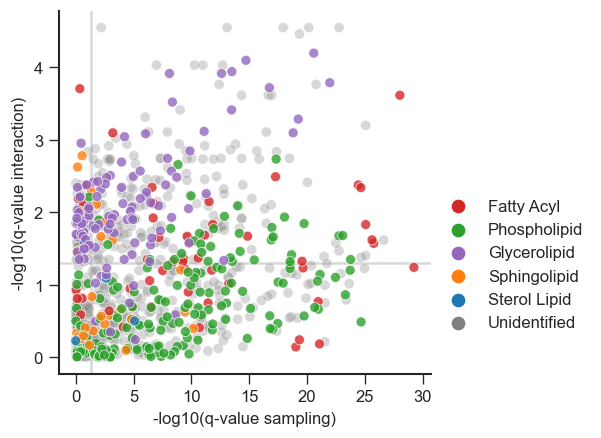

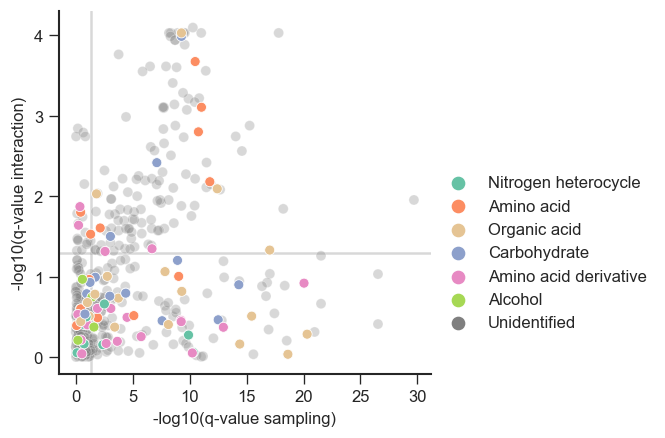

In [77]:
pval_pval_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, _type='lipid')
ax = plt.gca()
ax.set_xlabel('-log10(q-value sampling)')
ax.set_ylabel('-log10(q-value interaction)')

pval_pval_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, _type='metabolite', alpha=1)
ax = plt.gca()
ax.set_xlabel('-log10(q-value sampling)')
ax.set_ylabel('-log10(q-value interaction)')

pval_pval_plot(x='log_qval_ogtt', y='log_qval_sampling:ogtt', df=fc, _type='lipid')
ax = plt.gca()
ax.set_xlabel('-log10(q-value OGTT glucose AUC)')
ax.set_ylabel('-log10(q-value interaction)')

pval_pval_plot(x='log_qval_ogtt', y='log_qval_sampling:ogtt', df=fc, _type='metabolite')
ax = plt.gca()
ax.set_xlabel('-log10(q-value OGTT glucose AUC)')
ax.set_ylabel('-log10(q-value interaction)')